In [12]:
import os
import matplotlib.pyplot as plt
import json
import numpy as np

In [25]:
dataset = "lfw"
basepath = f"../lightning_logs/{dataset}"
# "deterministic", "mc_dropout", "hib", "pfe",
labels = ["P-E-Fix", "P-E-Pos", "P-E-Full", "P-A-Fix", "P-A-Pos", "P-A-Full", "O-E-Fix", "O-E-Pos", "O-E-Full", "O-A-Fix", "O-A-Pos", "O-A-Full"]
models = [ "laplace_posthoc_fix", "laplace_posthoc_pos", "laplace_posthoc_full",
            "laplace_posthoc_arccos_fix", "laplace_posthoc_arccos_pos", "laplace_posthoc_arccos_full",
                "laplace_online_fix", "laplace_online_pos", "laplace_online_full",
                "laplace_online_arccos_fix", "laplace_online_arccos_pos", "laplace_online_arccos_full"]

#models = ["laplace_online_arccos_fix"]
#models = ["laplace_online_full"]
#models = ["hib"]

all_data = {}
for model in models:

    all_data[model] = {}
    for seed in range(1, 6):
        if "laplace_online" in model:
            if "arccos" in model:
                path = os.path.join(basepath, "laplace_online", str(seed), "arccos", model.split("_")[-1], "results/metrics.json")
            else:
                path = os.path.join(basepath, "laplace_online", str(seed), "contrastive", model.split("_")[-1], "results/metrics.json")
        elif "laplace_posthoc" in model:
            if "arccos" in model:
                path = os.path.join(basepath, "laplace_posthoc", str(seed), "arccos", model.split("_")[-1], "results/metrics.json")
            else:
                path = os.path.join(basepath, "laplace_posthoc", str(seed), "contrastive", model.split("_")[-1], "results/metrics.json")
        else:
            path = os.path.join(basepath, model, str(seed), "results/metrics.json")

        if not os.path.isfile(path):
            print(f"missing => {model} with seed {seed}")
            continue

        with open(path, 'r') as f:
            data = json.load(f)

        for key in data:
            if key in all_data[model]: 
                all_data[model][key] += [data[key]]
            else:
                all_data[model][key] = [data[key]]
        

missing => laplace_posthoc_fix with seed 5
missing => laplace_posthoc_pos with seed 5
missing => laplace_posthoc_full with seed 5
missing => laplace_posthoc_arccos_fix with seed 5
missing => laplace_posthoc_arccos_pos with seed 5
missing => laplace_posthoc_arccos_full with seed 5
missing => laplace_online_pos with seed 5
missing => laplace_online_full with seed 5
missing => laplace_online_arccos_pos with seed 1
missing => laplace_online_arccos_pos with seed 2
missing => laplace_online_arccos_pos with seed 3
missing => laplace_online_arccos_pos with seed 4
missing => laplace_online_arccos_pos with seed 5
missing => laplace_online_arccos_full with seed 5


In [26]:
first_row = ["", "M@1", "M@5", "M@10", "AUROC", "AUPRC", "AUSC", "ECE"]
print("    &   ".join(first_row) + r"\\")

for model in all_data.keys():
    if "map" in all_data[model]:
        
        map = np.array(all_data[model]["map"])[:, :2]
        recall = np.array(all_data[model]["recall"])[:, :1]

        row = [model]
        row += [f"{np.round(m,2)}" + r"\pm" + f"{np.round(s,2)}" for m, s in zip(recall.mean(axis=0), recall.std(axis=0))]
        row += [f"{np.round(m,2)}" + r"\pm" + f"{np.round(s,2)}" for m, s in zip(map.mean(axis=0), map.std(axis=0))]
        

        for m in ["auroc", "auprc", "ausc", "ece"]:
            if m in all_data[model]:
                val = np.array(all_data[model][m])
                row += [f"{np.round(val.mean(),2)}" + r"\pm" + f"{np.round(val.std(),2)}"]
            else:
                row += ["-"]

        latex_row = ""
        for i, r in enumerate(row):
            end = " & " if i != len(row) - 1 else r" \\"

            latex_row += "$" + r + "$" + end if i > 0 else r.replace("_", " ") + end

        print(latex_row)

    &   M@1    &   M@5    &   M@10    &   AUROC    &   AUPRC    &   AUSC    &   ECE\\
laplace posthoc fix & $0.45\pm0.0$ & $0.7\pm0.0$ & $0.67\pm0.0$ & $0.57\pm0.25$ & $0.68\pm0.19$ & $0.44\pm0.01$ & $0.57\pm0.01$ \\
laplace posthoc pos & $0.45\pm0.0$ & $0.7\pm0.0$ & $0.67\pm0.0$ & $0.58\pm0.23$ & $0.68\pm0.18$ & $0.45\pm0.01$ & $0.56\pm0.01$ \\
laplace posthoc full & $0.45\pm0.01$ & $0.7\pm0.0$ & $0.67\pm0.0$ & $0.56\pm0.26$ & $0.68\pm0.19$ & $0.44\pm0.01$ & $0.57\pm0.01$ \\
laplace posthoc arccos fix & $0.45\pm0.01$ & $0.69\pm0.0$ & $0.67\pm0.0$ & $0.53\pm0.2$ & $0.65\pm0.15$ & $0.46\pm0.02$ & $0.58\pm0.01$ \\
laplace posthoc arccos pos & $0.46\pm0.01$ & $0.7\pm0.0$ & $0.67\pm0.0$ & $0.29\pm0.11$ & $0.49\pm0.06$ & $0.48\pm0.01$ & $0.56\pm0.01$ \\
laplace posthoc arccos full & $0.45\pm0.01$ & $0.69\pm0.0$ & $0.67\pm0.0$ & $0.55\pm0.18$ & $0.66\pm0.14$ & $0.45\pm0.01$ & $0.57\pm0.01$ \\
laplace online fix & $0.37\pm0.01$ & $0.63\pm0.01$ & $0.6\pm0.01$ & $0.77\pm0.04$ & $0.78\pm0.05$ & 

In [27]:
first_row = ["", "R@1", "R@5", "R@10", "R@20", "M@5", "M@10", "M@20", "AUROC", "AUPRC", "AUSC", "ECE"]
print("    &   ".join(first_row) + r"\\")

for model in all_data.keys():
    if "map" in all_data[model]:
        
        map = np.array(all_data[model]["map"])
        recall = np.array(all_data[model]["recall"])

        row = [model]
        row += [f"{np.round(m,2)}" + r"\pm" + f"{np.round(s,2)}" for m, s in zip(recall.mean(axis=0), recall.std(axis=0))]
        row += [f"{np.round(m,2)}" + r"\pm" + f"{np.round(s,2)}" for m, s in zip(map.mean(axis=0), map.std(axis=0))]
        

        for m in ["auroc", "auprc", "ausc", "ece"]:
            if m in all_data[model]:
                val = np.array(all_data[model][m])
                row += [f"{np.round(val.mean(),2)}" + r"\pm" + f"{np.round(val.std(),2)}"]
            else:
                row += ["-"]

        latex_row = ""
        for i, r in enumerate(row):
            end = " & " if i != len(row) - 1 else r" \\"

            latex_row += "$" + r + "$" + end if i > 0 else r.replace("_", " ") + end

        print(latex_row)

    &   R@1    &   R@5    &   R@10    &   R@20    &   M@5    &   M@10    &   M@20    &   AUROC    &   AUPRC    &   AUSC    &   ECE\\
laplace posthoc fix & $0.45\pm0.0$ & $0.54\pm0.0$ & $0.57\pm0.0$ & $0.6\pm0.0$ & $0.7\pm0.0$ & $0.67\pm0.0$ & $0.66\pm0.0$ & $0.57\pm0.25$ & $0.68\pm0.19$ & $0.44\pm0.01$ & $0.57\pm0.01$ \\
laplace posthoc pos & $0.45\pm0.0$ & $0.54\pm0.0$ & $0.57\pm0.0$ & $0.6\pm0.0$ & $0.7\pm0.0$ & $0.67\pm0.0$ & $0.66\pm0.0$ & $0.58\pm0.23$ & $0.68\pm0.18$ & $0.45\pm0.01$ & $0.56\pm0.01$ \\
laplace posthoc full & $0.45\pm0.01$ & $0.54\pm0.0$ & $0.57\pm0.0$ & $0.6\pm0.0$ & $0.7\pm0.0$ & $0.67\pm0.0$ & $0.66\pm0.0$ & $0.56\pm0.26$ & $0.68\pm0.19$ & $0.44\pm0.01$ & $0.57\pm0.01$ \\
laplace posthoc arccos fix & $0.45\pm0.01$ & $0.54\pm0.0$ & $0.57\pm0.0$ & $0.6\pm0.0$ & $0.69\pm0.0$ & $0.67\pm0.0$ & $0.65\pm0.0$ & $0.53\pm0.2$ & $0.65\pm0.15$ & $0.46\pm0.02$ & $0.58\pm0.01$ \\
laplace posthoc arccos pos & $0.46\pm0.01$ & $0.54\pm0.0$ & $0.57\pm0.0$ & $0.6\pm0.0$ & $0.7\pm0

In [28]:
first_row = ["", "R@1", "R@5", "R@10", "R@20", "M@5", "M@10", "M@20", "AUROC", "AUPRC", "AUSC", "ECE"]
print("    &   ".join(first_row))

for model in all_data.keys():
    if "map" in all_data[model]:
        
        map = np.array(all_data[model]["map"])
        recall = np.array(all_data[model]["recall"])

        row = [model]
        row += [f"{np.round(m,2)}"  for m, s in zip(recall.mean(axis=0), recall.std(axis=0))]
        row += [f"{np.round(m,2)}" for m, s in zip(map.mean(axis=0), map.std(axis=0))]
        

        for m in ["auroc", "auprc", "ausc", "ece"]:
            if m in all_data[model]:
                val = np.array(all_data[model][m])
                row += [f"{np.round(val.mean(),2)}"]
            else:
                row += ["-"]

        print(" & ".join(row))

    &   R@1    &   R@5    &   R@10    &   R@20    &   M@5    &   M@10    &   M@20    &   AUROC    &   AUPRC    &   AUSC    &   ECE
laplace_posthoc_fix & 0.45 & 0.54 & 0.57 & 0.6 & 0.7 & 0.67 & 0.66 & 0.57 & 0.68 & 0.44 & 0.57
laplace_posthoc_pos & 0.45 & 0.54 & 0.57 & 0.6 & 0.7 & 0.67 & 0.66 & 0.58 & 0.68 & 0.45 & 0.56
laplace_posthoc_full & 0.45 & 0.54 & 0.57 & 0.6 & 0.7 & 0.67 & 0.66 & 0.56 & 0.68 & 0.44 & 0.57
laplace_posthoc_arccos_fix & 0.45 & 0.54 & 0.57 & 0.6 & 0.69 & 0.67 & 0.65 & 0.53 & 0.65 & 0.46 & 0.58
laplace_posthoc_arccos_pos & 0.46 & 0.54 & 0.57 & 0.6 & 0.7 & 0.67 & 0.66 & 0.29 & 0.49 & 0.48 & 0.56
laplace_posthoc_arccos_full & 0.45 & 0.54 & 0.57 & 0.6 & 0.69 & 0.67 & 0.65 & 0.55 & 0.66 & 0.45 & 0.57
laplace_online_fix & 0.37 & 0.5 & 0.53 & 0.57 & 0.63 & 0.6 & 0.59 & 0.77 & 0.78 & 0.31 & 0.65
laplace_online_pos & 0.46 & 0.55 & 0.58 & 0.61 & 0.7 & 0.68 & 0.66 & 0.38 & 0.55 & 0.47 & 0.75
laplace_online_full & 0.43 & 0.53 & 0.56 & 0.59 & 0.67 & 0.64 & 0.62 & 0.59 & 0.66 & 

In [81]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=3, rc={"lines.linewidth": 6, "font.sans-serif": "Helvetica, Arial, DejaVu Sans"})

In [71]:
all_data.keys()

dict_keys(['laplace_posthoc_fix', 'laplace_posthoc_pos', 'laplace_posthoc_full', 'laplace_posthoc_arccos_fix', 'laplace_posthoc_arccos_pos', 'laplace_posthoc_arccos_full', 'laplace_online_fix', 'laplace_online_pos', 'laplace_online_full', 'laplace_online_arccos_fix', 'laplace_online_arccos_pos', 'laplace_online_arccos_full'])

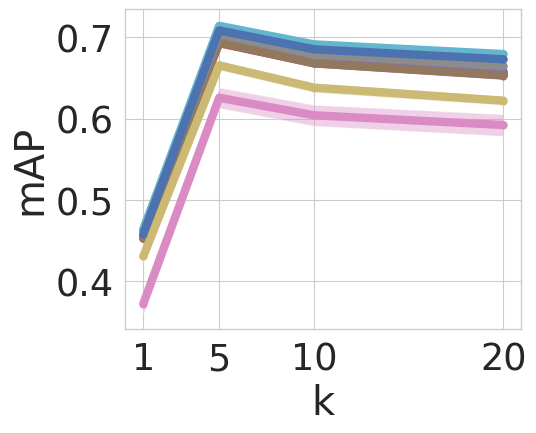

In [72]:
fig = plt.figure(figsize=(6, 5))
for i, model in enumerate(all_data.keys()):
    if "map" in all_data[model]:

        map = np.array(all_data[model]["map"])
        recall = np.array(all_data[model]["recall"])

        y = np.array([recall.mean(axis=0)[0], *map.mean(axis=0)])
        ci = np.array([recall.std(axis=0)[0], *map.std(axis=0)])

        x = [1, 5, 10, 20]
        plt.plot(x, y, "-o", label=labels[i])
        # Plot the confidence interval
        plt.fill_between(x, (y-ci), (y+ci), alpha=0.4)
    
plt.xlabel("k")
plt.ylabel("mAP")
#plt.legend()
plt.tight_layout()
plt.xticks([1, 5, 10, 20], [1, 5, 10, 20])
os.makedirs(f"../results/{dataset}", exist_ok=True)
plt.savefig(f"../results/{dataset}/map.pdf")
plt.show()

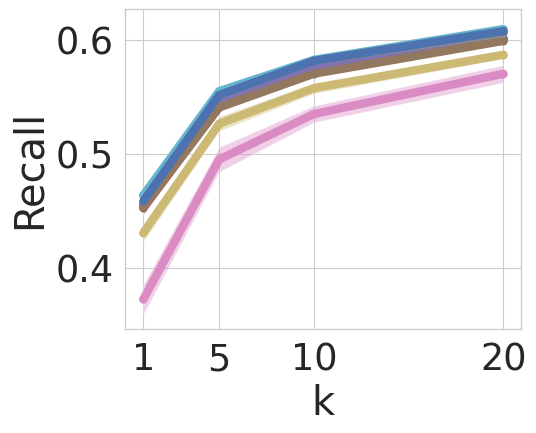

In [75]:
#import seaborn as sns
#sns.set_theme(style="whitegrid")
#sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 2.5})
fig = plt.figure(figsize=(6, 5))
for i, model in enumerate(all_data.keys()):
    if "recall" in all_data[model]:

        recall = np.array(all_data[model]["recall"])

        y = recall.mean(axis=0)
        ci = recall.std(axis=0)

        x = [1, 5, 10, 20]
        plt.plot(x, y, "-o", label=labels[i])
        # Plot the confidence interval
        plt.fill_between(x, (y-ci), (y+ci), alpha=0.4)
    
plt.xlabel("k")
plt.ylabel("Recall")
plt.xticks([1, 5, 10, 20], [1, 5, 10, 20])
#plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.savefig(f"../results/{dataset}/recall.pdf")
plt.show()

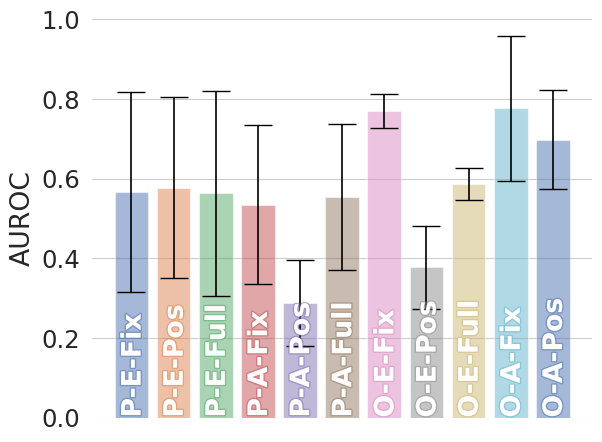

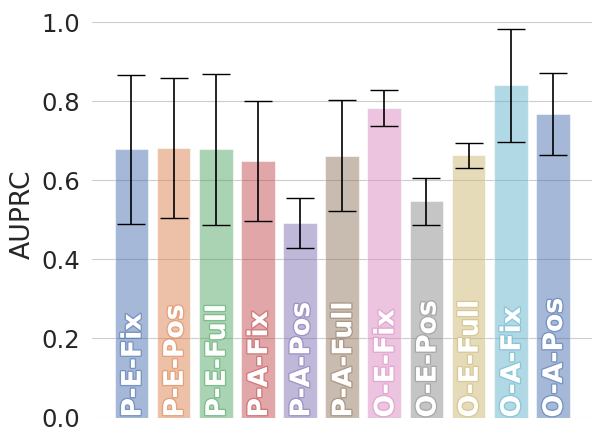

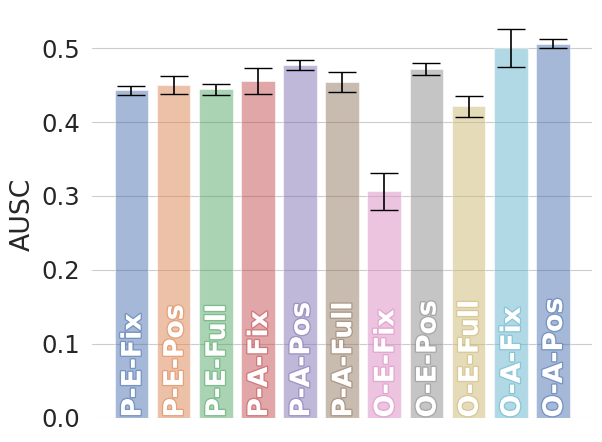

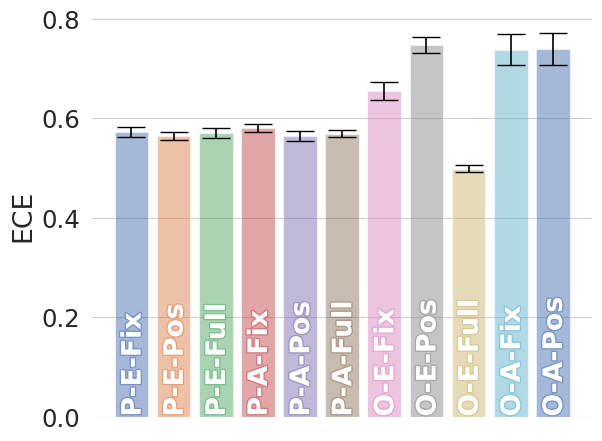

In [97]:
import seaborn as sns
from matplotlib import patheffects
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=2)#, rc={"lines.linewidth": 2.5})

for metric in ["auroc", "auprc", "ausc", "ece"]:
    fig, ax = plt.subplots()
    x_pos = -1
    names = []
    for model in all_data.keys():
        
        if metric in all_data[model]:
            x_pos += 1
            names.append(model)
            val = np.array(all_data[model][metric])

            y = val.mean(axis=0)
            ci = val.std(axis=0)

            ax.bar(x_pos, y, yerr=ci, align='center', alpha=0.5, ecolor='black', capsize=10)


    sns.despine(left=True, right=True, top=True, bottom=True)
    for bar, model in zip(ax.patches, labels):
        t = ax.text(bar.get_x()+bar.get_width()/2+0.05, 0, model, fontweight="heavy", color='white', ha='center', va='bottom', rotation=90) 
        t.set_path_effects([patheffects.withStroke(linewidth=2, foreground=bar.get_facecolor())])
            
    #ax.set_title(metric)
    #ax.set_xticks(list(range(len(names))))
    #ax.set_xticklabels(names, rotation = 90)
    ax.xaxis.set_visible(False)
    #ax.set_xticklabels(labels[:-1], rotation = 90)
    ax.set_ylabel(metric.upper())
    plt.tight_layout()
    plt.savefig(f"../results/{dataset}/{metric}.pdf")        
    plt.show()

In [79]:
metric.upper()

'AUROC'